# 0. Load packages and functions

In [2]:
import os, glob, h5py, json, sys
from datafed.CommandLib import API
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('../libs/') 
from analyze_spot_functions import NormalizeData, Gaussian, RHEED_image_processer
from visualize_functions import show_images, set_labels

# 1. download datasets from DataFed

In [4]:
# df_api = API()
# ls_resp = df_api.collectionItemsList('c/393370045')
# print(ls_resp)

In [5]:
# # sample 1
# dv_resp = df_api.dataView('d/400460226')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

In [6]:
# # sample 2
# dv_resp = df_api.dataView('d/400569828')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

In [7]:
# # sample 3
# dv_resp = df_api.dataView('d/403087357')
# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '../../data/', orig_fname=True, wait=True)
# get_resp

# 2. Process images to get RHEED intensity data

## 2.1 sample - t0.21

In [5]:
path_test6 = 'D:/datasets/RHEED_data/STO_STO_test6_06292022_standard.h5'

### 2.1.1 Information about dataset

In [6]:
with h5py.File(path_test6, mode='r') as h5:
    print('Key parameters:', list(h5.keys()))
    print('Size of data:', h5['growth_2'].shape)

Key parameters: ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
Size of data: (12858, 300, 300)


### 2.1.2 Locate the spots

<IPython.core.display.Javascript object>


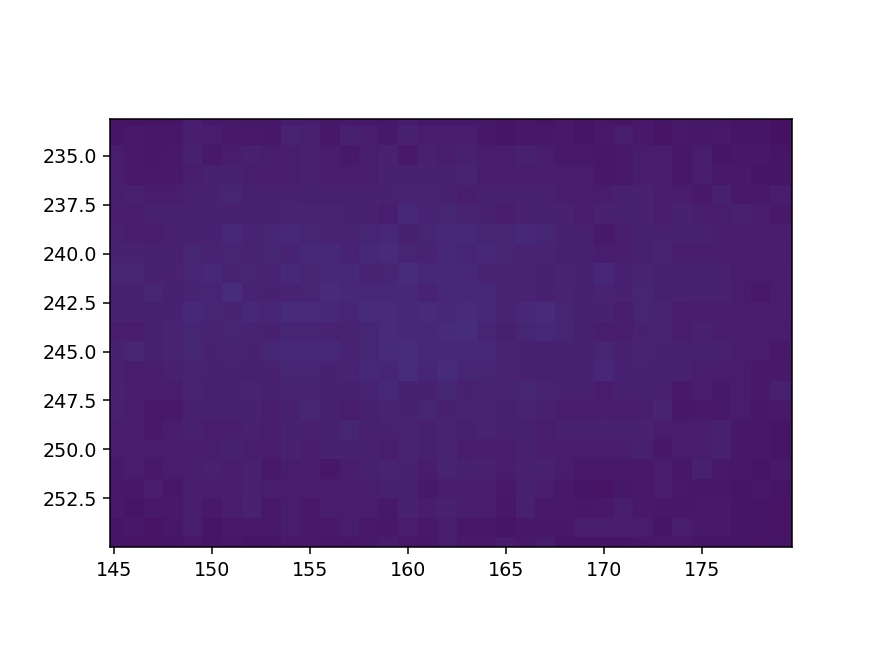

In [33]:
%matplotlib notebook
with h5py.File(path_test6, mode='r') as h5:
    img = np.array(h5['growth_12'][0])
plt.imshow(img)
plt.show()

img_sum:45849.0, img_max:24.0, img_mean:19.10375
img_rec_sum:45763.43575488399, img_rec_max:20.093799077421355, img_rec_mean:19.068098231201663
height:20.094364592181986, x:20.82947012308175, y:35.6241338725194, width_x:41.99937598279206, width_y_max:113.53971085513348


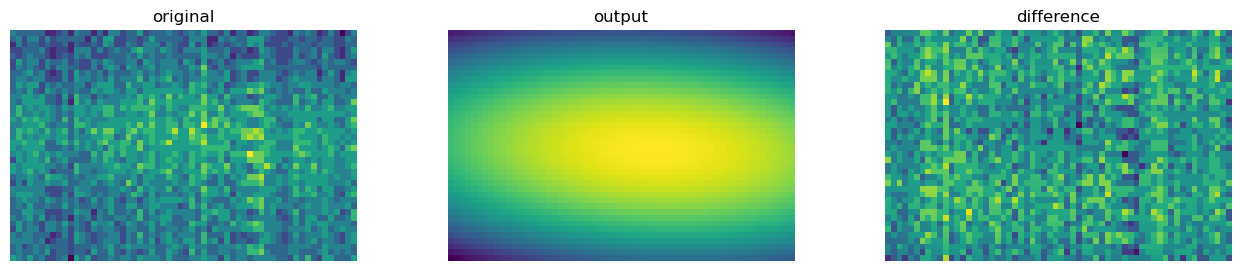

img_sum:88312.0, img_max:179.0, img_mean:63.44252873563219
img_rec_sum:83132.80608719256, img_rec_max:140.63109581534408, img_rec_mean:59.72184345344293
height:140.6799258630131, x:14.748342323577038, y:32.02098013423168, width_x:8.56002374888657, width_y_max:14.645011932504842


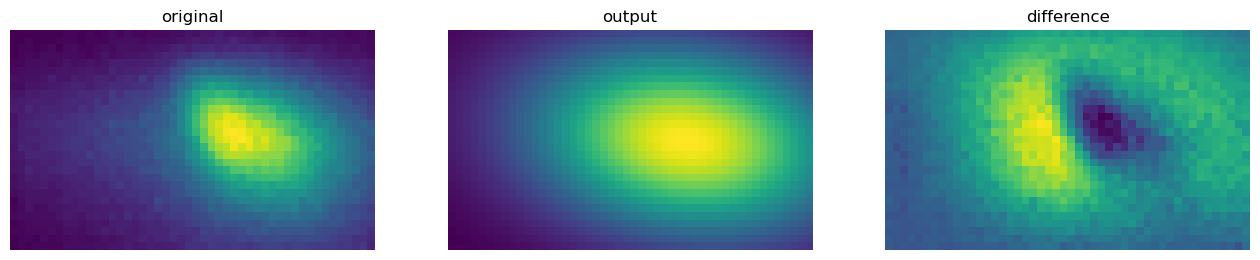

img_sum:66386.0, img_max:179.0, img_mean:75.43863636363636
img_rec_sum:63464.1303922885, img_rec_max:148.86320281477612, img_rec_mean:72.11832999123693
height:148.9042145462516, x:11.439166004373416, y:29.385597002309062, width_x:7.779757987855102, width_y_max:13.97889427620476


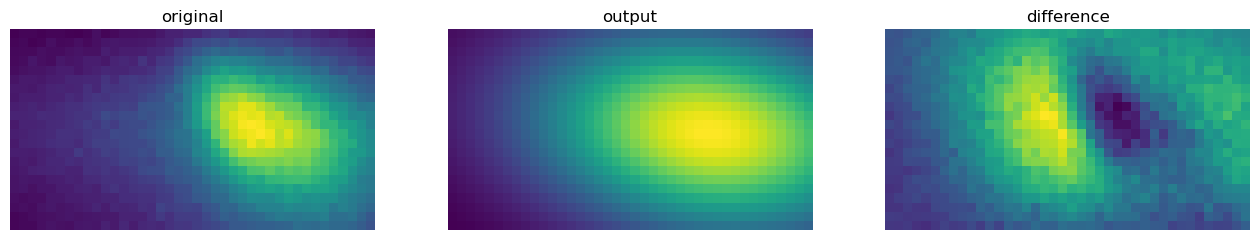

In [60]:
%matplotlib inline
crop_dict = {'spot_1': [40, 80, 100, 160], 'spot_2': [137, 166, 147, 195], 'spot_3': [140, 162, 150, 190]}
processsor = RHEED_image_processer(path_test6, crop_dict, Gaussian().recreate_gaussian, num_workers=1)

for spot in crop_dict.keys():
    img, img_rec, parameters = processsor.visualize(growth='growth_12', spot=spot, frame=42)

### 2.1.3 Generate the metrics of spot

In [61]:
%%time
growth_names = ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 
             'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
parameters_file_path = '../../data/test6_gaussian_fit_parameters_all-04212023.h5'

if __name__ == '__main__':
    processsor = RHEED_image_processer(path_test6, crop_dict, Gaussian().recreate_gaussian, num_workers=12)
    processsor.write_h5_file(parameters_file_path, growth_names, cover_file=True)

Wall time: 3min 36s


### 2.1.4 Visualize dataset

growth names: ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
spot names: <KeysViewHDF5 ['spot_1', 'spot_2', 'spot_3']>
img_sum:47210.0, img_max:27.0, img_mean:19.670833333333334
img_rec_sum:47069.61880084804, img_rec_max:21.56773452771814, img_rec_mean:19.612341167020016
height:21.56801418627541, x:22.40751505445951, y:30.537490284679038, width_x:34.65240661126213, width_y_max:65.4282164516331


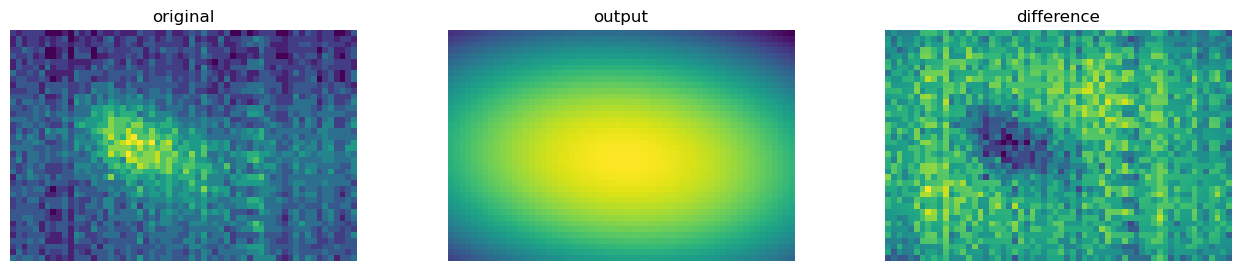

growth names: ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
spot names: <KeysViewHDF5 ['spot_1', 'spot_2', 'spot_3']>
img_sum:120347.0, img_max:255.0, img_mean:86.45617816091954
img_rec_sum:107956.03515895546, img_rec_max:247.06761946637596, img_rec_mean:77.55462295901972
height:247.69930709397966, x:16.677223954399683, y:21.858441390661714, width_x:7.417787683859308, width_y_max:11.003434259648335


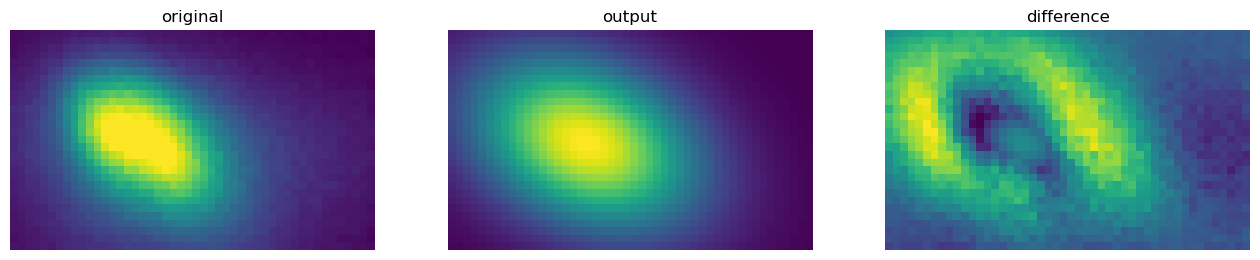

growth names: ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
spot names: <KeysViewHDF5 ['spot_1', 'spot_2', 'spot_3']>
img_sum:96979.0, img_max:255.0, img_mean:110.20340909090909
img_rec_sum:89595.01169435296, img_rec_max:257.09415699298063, img_rec_mean:101.81251328903745
height:257.3616937698129, x:13.1941490841543, y:18.105049606354292, width_x:6.980503072365877, width_y_max:10.567689131140753


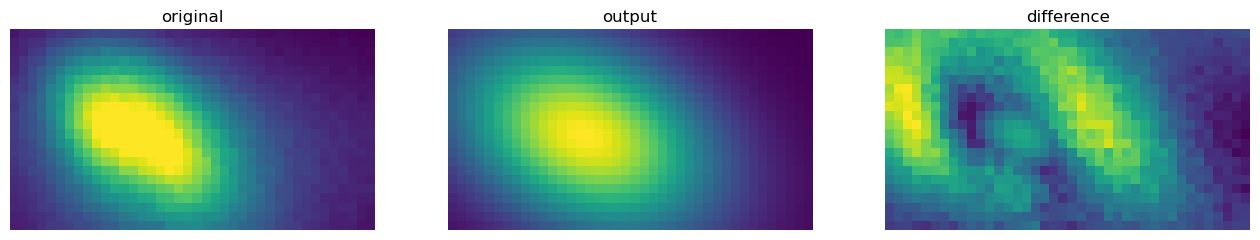

In [65]:
parameters_file_path = '../../data/test6_gaussian_fit_parameters_all-04212023.h5'
with h5py.File(parameters_file_path, mode='r') as h5:
    for spot in crop_dict.keys():
        print('growth names:', list(h5.keys()))
        print('spot names:', h5['growth_2'].keys())

        img = h5['growth_2'][spot]['img'][10]
        img_rec = h5['growth_2'][spot]['img_rec'][10]
        parameters = h5['growth_2'][spot]['parameters'][10]

        print(f'img_sum:{parameters[0]}, img_max:{parameters[1]}, img_mean:{parameters[2]}')
        print(f'img_rec_sum:{parameters[3]}, img_rec_max:{parameters[4]}, img_rec_mean:{parameters[5]}')
        print(f'height:{parameters[6]}, x:{parameters[7]}, y:{parameters[8]}, width_x:{parameters[9]}, width_y_max:{parameters[10]}')

        sample_list = [img, img_rec, img_rec-img]
        labels = ['original', 'output', 'difference']
        show_images(sample_list, labels, img_per_row=3)

### 2.1.5 Upload parameter file to DataFed

In [63]:
import re

In [64]:
name = re.split('/', parameters_file_path)[-1]
name

'test6_gaussian_fit_parameters_all-04212023.h5'

In [1]:
import os # For file level operations
import json # For dealing with metadata
from datafed.CommandLib import API
df_api = API()

name = 'test6_gaussian_fit_parameters_all-03292023'
dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, parameters_file_path, wait=True)
put_resp

(task {
   id: "task/456207783"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1680136486
   ut: 1680136640
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/C/Users/yig319/Dropbox (LU Student)/RHEED/data/test6_gaussian_fit_parameters_all-03292023.h5"
   dest: "d/456207777"
 },
 'TaskDataReply')

### 2.1.6 visualize parameters

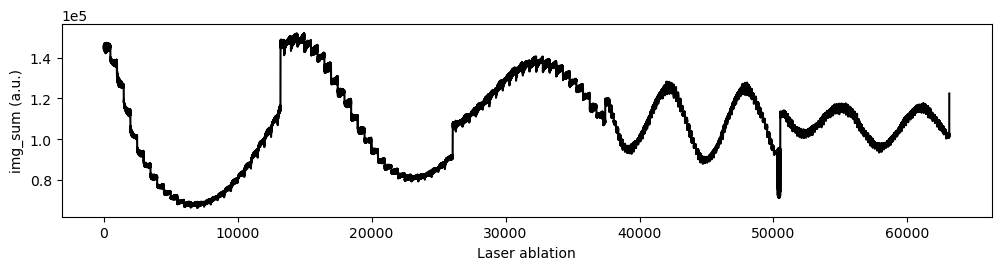

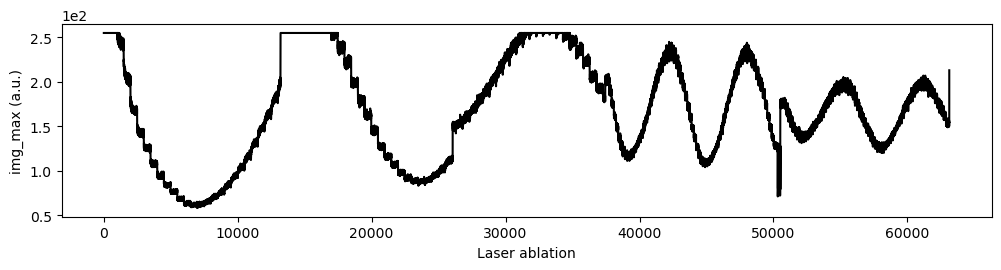

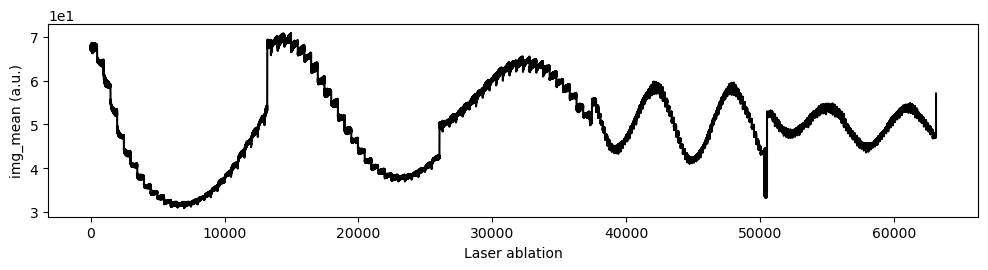

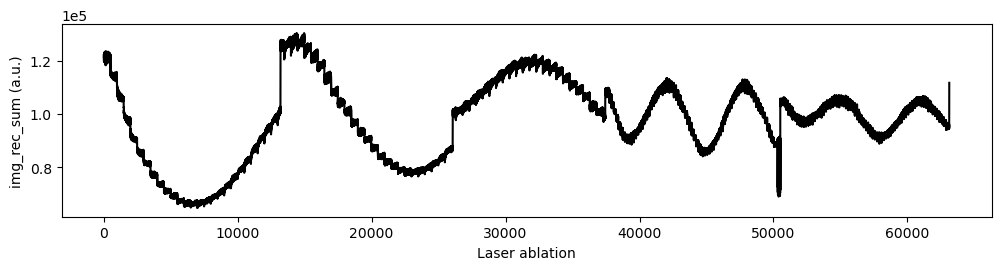

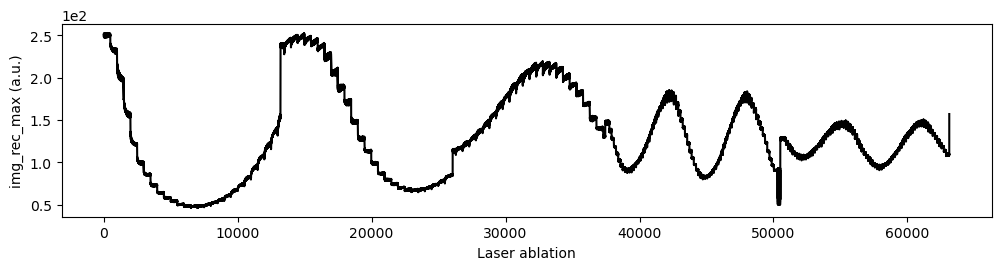

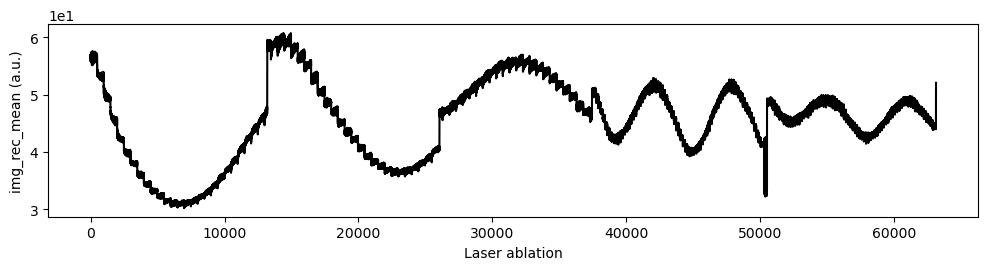

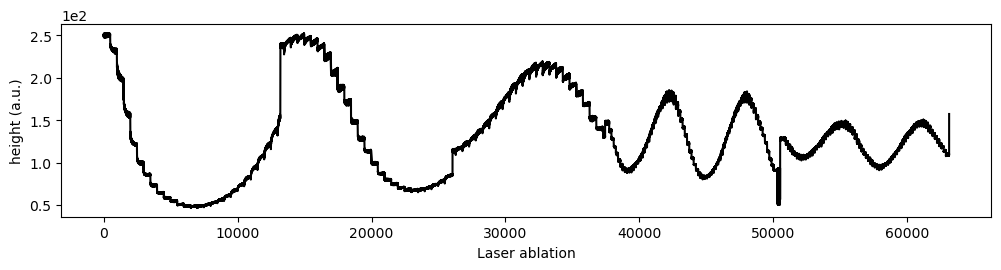

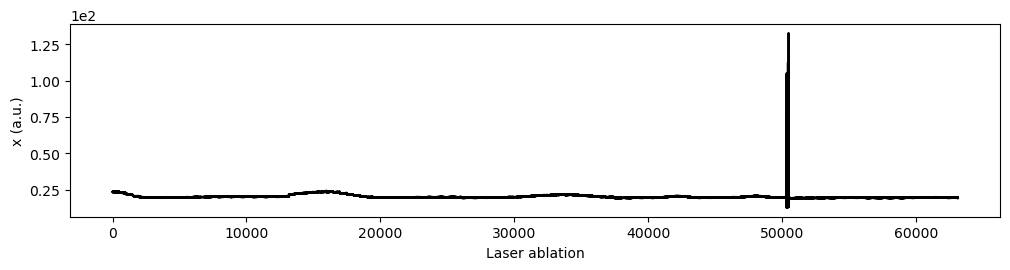

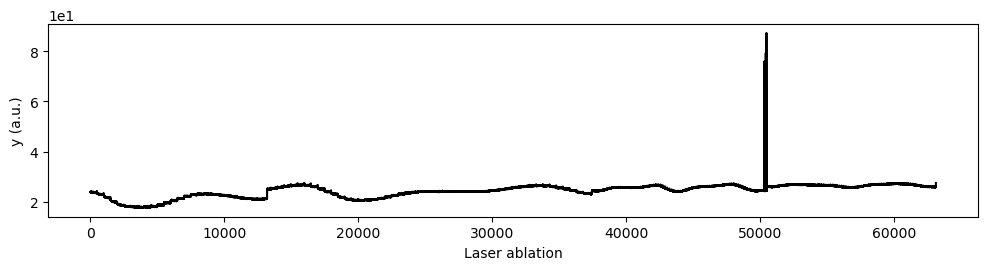

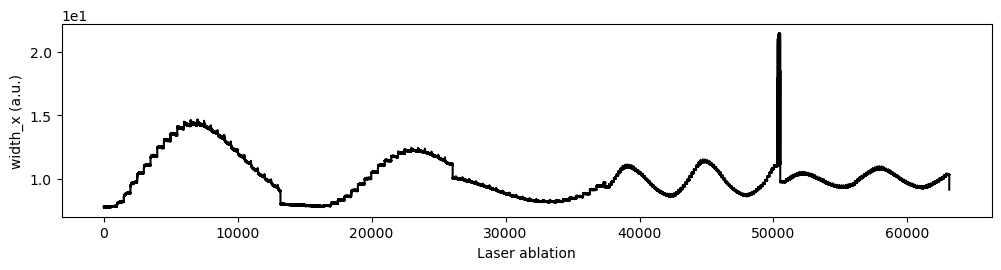

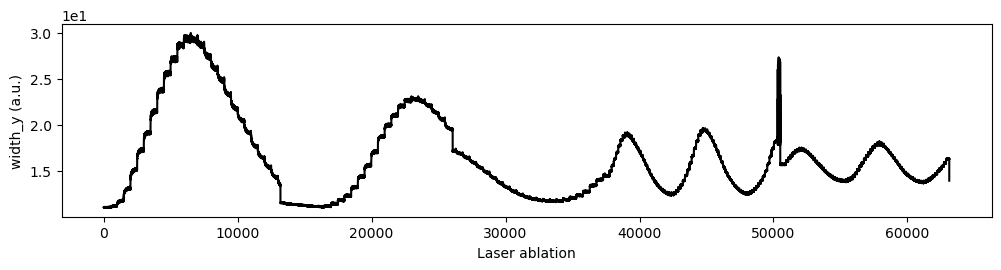

In [75]:
h5_para_file = 'C:/Users/yig319/Dropbox (LU Student)/RHEED/data/test6_gaussian_fit_parameters_all-03292023.h5'
growth_dict = {'growth_1.':1, 'growth_2':1, 'growth_3':1, 'growth_4':3, 'growth_5':3}

parameters_all = []
with h5py.File(h5_para_file, mode='r') as h5:
#     print(h5['growth_1.']['spot_2'].keys())
    for g in growth_dict.keys():
        parameters_all.append(np.array(h5[g]['spot_2']['parameters']))
parameters_all = np.concatenate(parameters_all)

titles = ['img_sum', 'img_max', 'img_mean', 'img_rec_sum', 'img_rec_max', 'img_rec_mean', 'height', 'x', 'y', 'width_x', 'width_y']
for i, title in enumerate(titles):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))
    plt.plot(parameters_all[:, i], color='k')
    set_labels(ax, xlabel='Laser ablation', ylabel=title+' (a.u.)')
    plt.savefig(f'../figures/s2.gaussian_parameters-TiO2_t0.21-{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

## 2.2 Sample 2 - TiO2 treated substrate with narrow step width (0.11±0.01μm)

In [1]:
path_test7 = 'D:/datasets/RHEED_data/STO_STO_test7_06292022-standard.h5'

### 2.2.1 Information about dataset

In [77]:
with h5py.File('D:/datasets/RHEED_data/STO_STO_test7_06292022-standard.h5', mode='r') as h5:
    print('Key parameters:', list(h5.keys()))
    print('Size of data:', h5['growth_2'].shape)

Key parameters: ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
Size of data: (10612, 300, 600)


### 2.2.2 Locate the spots

In [78]:
%matplotlib notebook
with h5py.File(RHEED_spot_file, mode='r') as h5:
    img = np.array(h5['growth_2'][0])
plt.imshow(img)
plt.show()

NameError: name 'RHEED_spot_file' is not defined

img_sum:119458.0, img_max:125.0, img_mean:44.2437037037037
img_rec_sum:111967.25365051093, img_rec_max:105.135481910003, img_rec_mean:41.469353203892936
height:105.17476960266731, x:14.699054688382482, y:46.32679100051201, width_x:-10.066277128050405, width_y_max:20.698593624570975


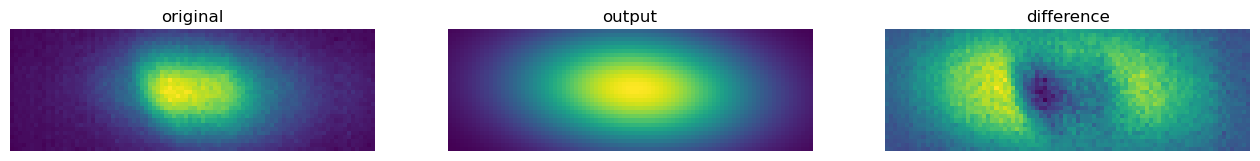

In [24]:
%matplotlib inline
RHEED_image_dataset_path = 'D:/datasets/RHEED_data/STO_STO_test7_06292022.h5'
crop_dict = {'spot_1': [40, 90, 360, 450], 'spot_2': [140, 170, 390, 480], 'spot_3': [220, 265, 355, 455]}
processsor = RHEED_image_processer(RHEED_image_dataset_path, crop_dict, Gaussian().recreate_gaussian, num_workers=12)

growth = 'growth_2'
spot='spot_2'
frame = 20
processsor.visualize(growth, spot, frame)

### 2.2.3 Generate the metrics of spot

In [25]:
%%time
RHEED_image_dataset_path = 'D:/datasets/RHEED_data/STO_STO_test7_06292022.h5'
parameters_file_path = '../../data/test7_gaussian_fit_parameters_all-03292023.h5'
growth_names = ['background_with_heater', 'background_without_heater', 'growth_1', 'growth_2', 'growth_3', 'growth_4', 
             'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9', 'growth_10', 'growth_11', 'growth_12']
crop_dict = {'spot_1': [40, 90, 360, 450], 'spot_2': [140, 170, 390, 480], 'spot_3': [220, 265, 355, 455]}
    
if __name__ == '__main__':
    processsor = RHEED_image_processer(RHEED_image_dataset_path, crop_dict, Gaussian().recreate_gaussian, num_workers=12)
    processsor.write_h5_file(parameters_file_path, growth_names, cover_file=True)

Wall time: 17min 33s


### 2.2.4 Visualize dataset

growth names: ['background_with_heater', 'background_without_heater', 'growth_1.', 'growth_10', 'growth_11', 'growth_12', 'growth_2', 'growth_3', 'growth_4', 'growth_5', 'growth_6', 'growth_7', 'growth_8', 'growth_9']
spot names: <KeysViewHDF5 ['spot_1', 'spot_2', 'spot_3']>
img_sum:118473.0, img_max:125.0, img_mean:43.87888888888889
img_rec_sum:111049.83352111821, img_rec_max:104.06832344616532, img_rec_mean:41.12956797078452
height:104.09343769046654, x:14.603732641750122, y:46.28800833550977, width_x:-10.073431720339931, width_y_max:20.743517331884426


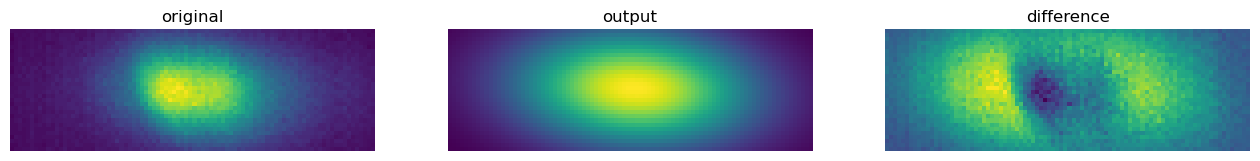

In [26]:
parameters_file_path = '../../data/test7_gaussian_fit_parameters_all-03292023.h5'
with h5py.File(parameters_file_path, mode='r') as h5:
    print('growth names:', list(h5.keys()))
    print('spot names:', h5['growth_2'].keys())

    img = h5['growth_2']['spot_2']['img'][10]
    img_rec = h5['growth_2']['spot_2']['img_rec'][10]
    parameters = h5['growth_2']['spot_2']['parameters'][10]
    
    print(f'img_sum:{parameters[0]}, img_max:{parameters[1]}, img_mean:{parameters[2]}')
    print(f'img_rec_sum:{parameters[3]}, img_rec_max:{parameters[4]}, img_rec_mean:{parameters[5]}')
    print(f'height:{parameters[6]}, x:{parameters[7]}, y:{parameters[8]}, width_x:{parameters[9]}, width_y_max:{parameters[10]}')
    
    sample_list = [img, img_rec, img_rec-img]
    labels = ['original', 'output', 'difference']
    show_images(sample_list, labels, img_per_row=3)

### 2.2.5 Upload parameter file to DataFed

In [2]:
import os # For file level operations
import json # For dealing with metadata
from datafed.CommandLib import API
df_api = API()

name = 'test7_gaussian_fit_parameters_all-03292023'
dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, '../../data/'+name+'.h5', wait=True)
put_resp

(task {
   id: "task/456208262"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1680136644
   ut: 1680136919
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/C/Users/yig319/Dropbox (LU Student)/RHEED/data/test7_gaussian_fit_parameters_all-03292023.h5"
   dest: "d/456208256"
 },
 'TaskDataReply')

### 2.2.6 Visualize parameters

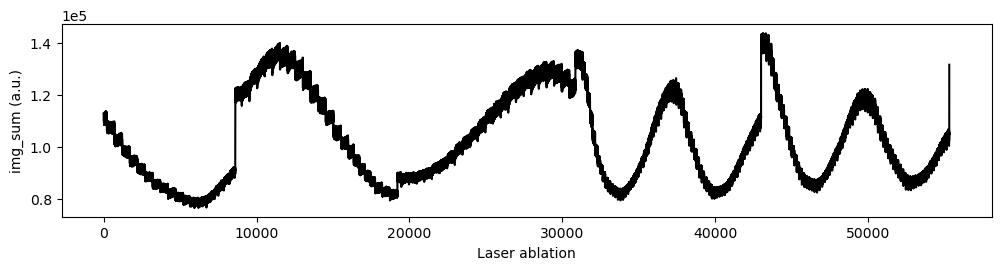

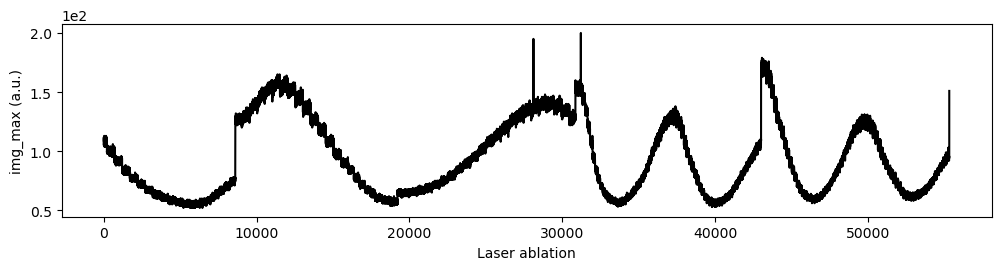

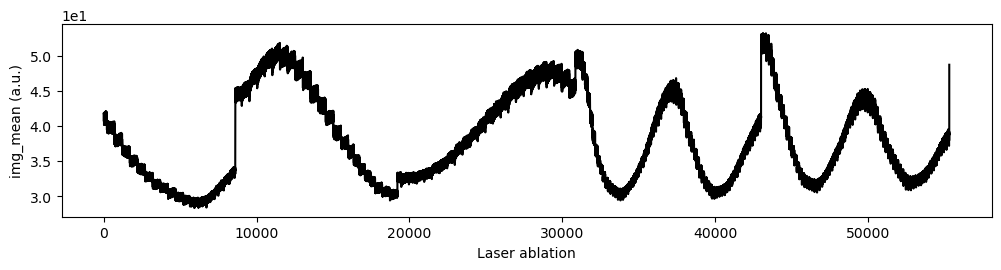

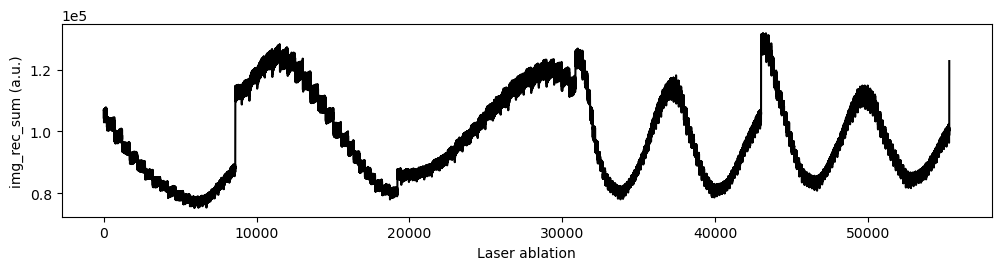

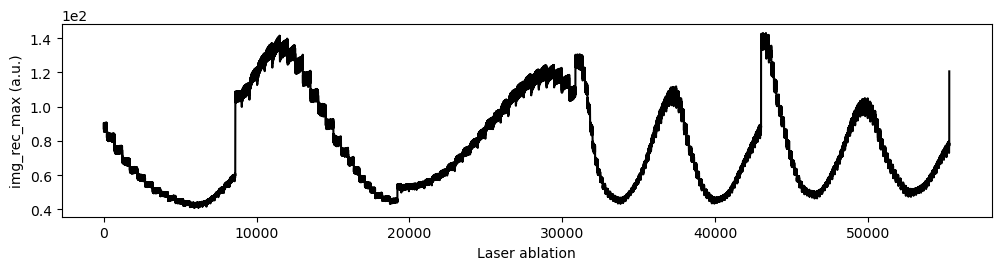

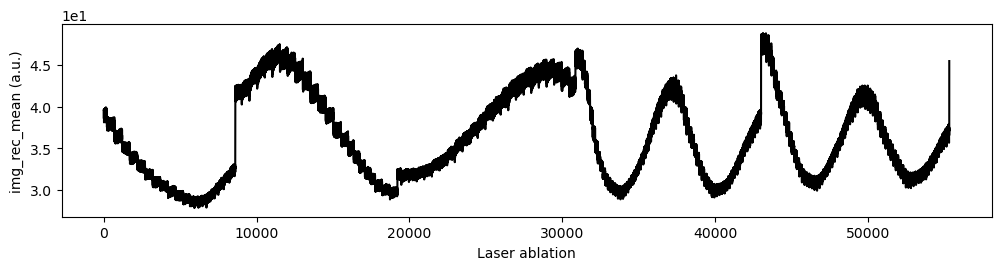

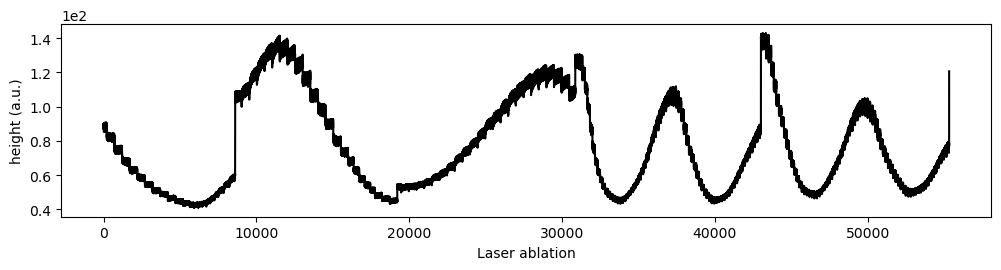

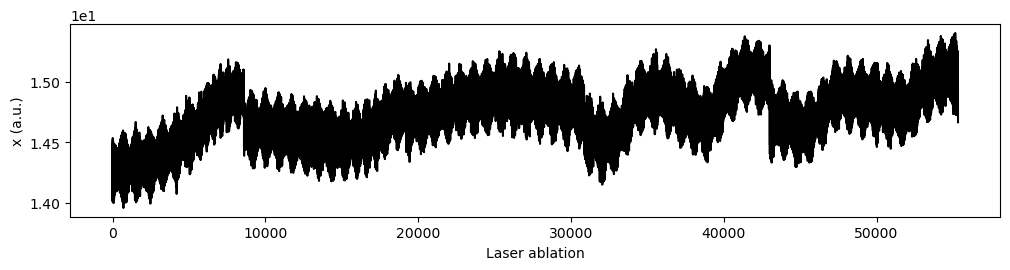

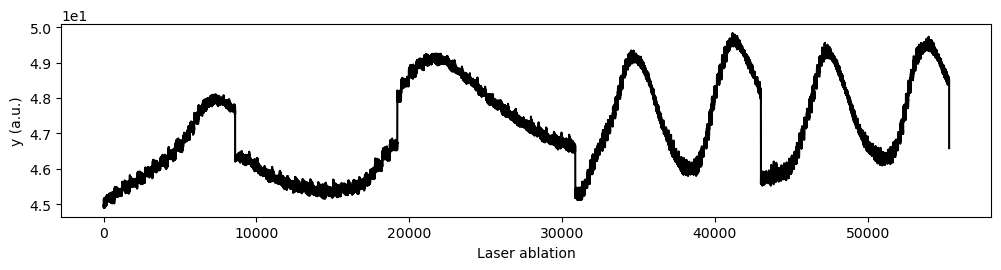

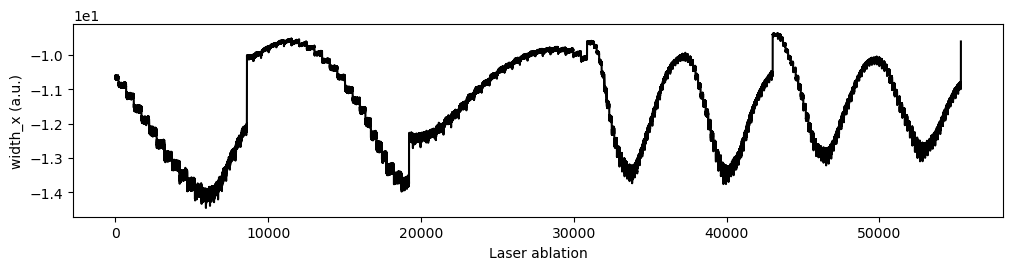

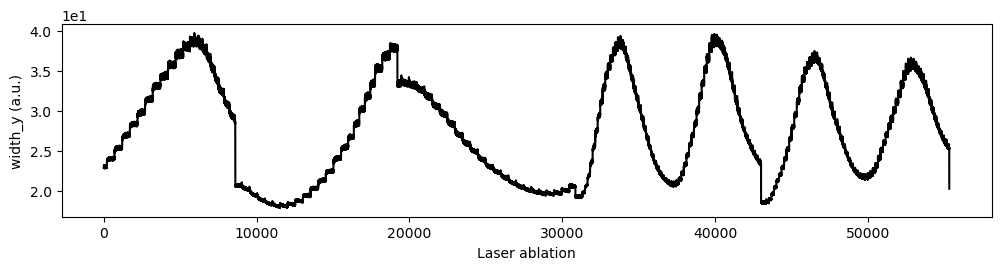

In [74]:
h5_para_file = 'C:/Users/yig319/Dropbox (LU Student)/RHEED/data/test7_gaussian_fit_parameters_all-03292023.h5'
growth_dict = {'growth_1.':1, 'growth_2':1, 'growth_3':1, 'growth_4':3, 'growth_5':3}
parameters_all = []
with h5py.File(h5_para_file, mode='r') as h5:
    for g in growth_dict.keys():
        parameters_all.append(np.array(h5[g]['spot_2']['parameters']))
parameters_all = np.concatenate(parameters_all)

titles = ['img_sum', 'img_max', 'img_mean', 'img_rec_sum', 'img_rec_max', 'img_rec_mean', 'height', 'x', 'y', 'width_x', 'width_y']
for i, title in enumerate(titles):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))
    plt.plot(parameters_all[:, i], color='k')
    set_labels(ax, xlabel='Laser ablation', ylabel=title+' (a.u.)')
    plt.savefig(f'../figures/s2.gaussian_parameters-TiO2_t0.08-{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

## 2.3 Sample 3 - untreated substrate (0.28±0.03 μm)

### 2.3.1 Information about dataset

In [30]:
with h5py.File('D:/datasets/RHEED_data/STO_STO_test9_07142022.h5', mode='r') as h5:
    print('Key parameters:', list(h5.keys()))
    print('Size of data:', h5['growth_02'].shape)

Key parameters: ['background_with_heater', 'background_without_heater', 'growth_01', 'growth_02', 'growth_03', 'growth_04', 'growth_05', 'growth_06', 'growth_07', 'growth_08', 'growth_09', 'growth_10', 'growth_11', 'growth_12', 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
Size of data: (9321, 300, 300)


### 2.3.2 Locate the spots

<IPython.core.display.Javascript object>


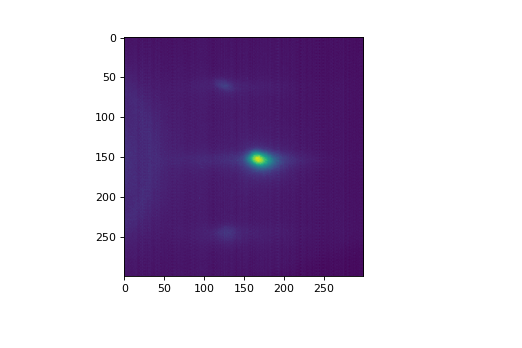

In [19]:
%matplotlib notebook
with h5py.File(RHEED_spot_file, mode='r') as h5:
    img = np.array(h5['growth_02'][0])
plt.imshow(img)
plt.show()

img_sum:70141.0, img_max:123.0, img_mean:53.137121212121215
img_rec_sum:67169.73377878327, img_rec_max:105.28017839593733, img_rec_mean:50.886161953623684
height:105.29773312720596, x:15.39420915575617, y:22.79123023433186, width_x:9.159300302918542, width_y_max:14.823547760763535


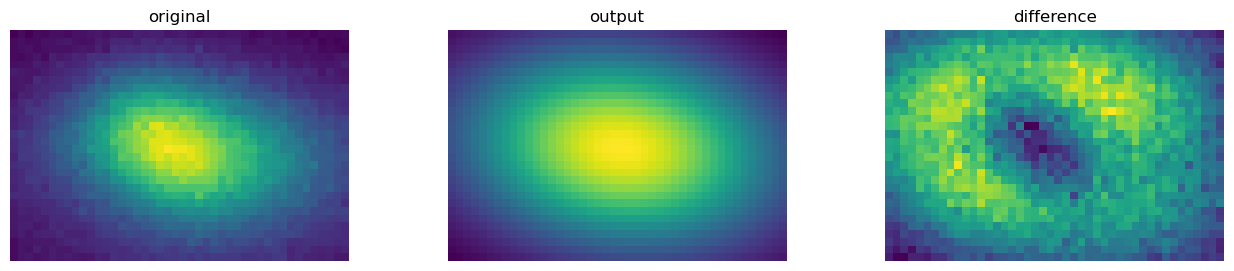

In [32]:
%matplotlib inline
RHEED_image_dataset_path = 'D:/datasets/RHEED_data/STO_STO_test9_07142022.h5'
crop_dict = {'spot_1': [48, 77, 110, 142], 'spot_2': [140, 170, 148, 192], 'spot_3': [230, 263, 114, 145]}
processsor = RHEED_image_processer(RHEED_image_dataset_path, crop_dict, Gaussian().recreate_gaussian, num_workers=12)

growth = 'growth_02'
spot='spot_2'
frame = 20
processsor.visualize(growth, spot, frame)

### 2.3.3 Generate the metrics of spot

In [33]:
%%time
RHEED_image_dataset_path = 'D:/datasets/RHEED_data/STO_STO_test9_07142022.h5'
parameters_file_path = '../../data/test9_gaussian_fit_parameters_all-03292023.h5'
growth_names = ['background_with_heater', 'background_without_heater', 'growth_01', 'growth_02', 
                'growth_03', 'growth_04', 'growth_05', 'growth_06', 'growth_07', 'growth_08', 'growth_09', 'growth_10', 
                'growth_11', 'growth_12', 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
crop_dict = {'spot_1': [48, 77, 110, 142], 'spot_2': [140, 170, 148, 192], 'spot_3': [230, 263, 114, 145]}
    
if __name__ == '__main__':
    processsor = RHEED_image_processer(RHEED_image_dataset_path, crop_dict, Gaussian().recreate_gaussian, num_workers=12)
    processsor.write_h5_file(parameters_file_path, growth_names, cover_file=True)

Wall time: 19min 46s


### 2.3.4 Visualize dataset

growth names: ['background_with_heater', 'background_without_heater', 'growth_01', 'growth_02', 'growth_03', 'growth_04', 'growth_05', 'growth_06', 'growth_07', 'growth_08', 'growth_09', 'growth_10', 'growth_11', 'growth_12', 'growth_13', 'growth_14', 'growth_15', 'growth_16', 'growth_17', 'growth_18']
spot names: <KeysViewHDF5 ['spot_1', 'spot_2', 'spot_3']>
img_sum:68656.0, img_max:120.0, img_mean:52.012121212121215
img_rec_sum:65735.49927602791, img_rec_max:103.12983413542759, img_rec_mean:49.79962066365751
height:103.13039241687206, x:15.545379675324755, y:22.940006950999553, width_x:9.160196622282617, width_y_max:14.813902290271017


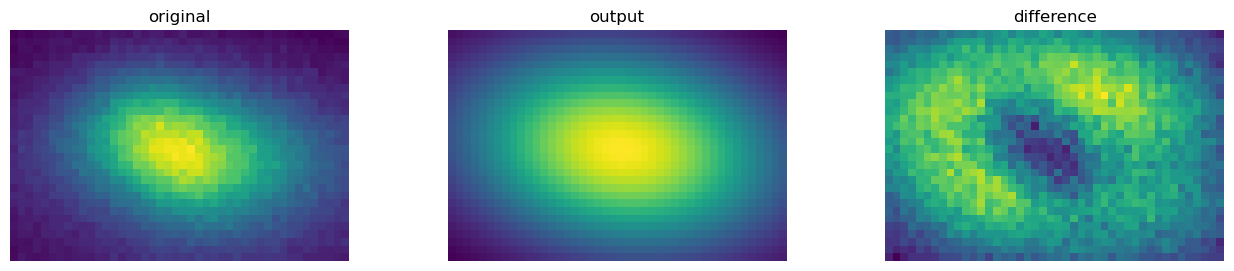

In [34]:
parameters_file_path = '../../data/test9_gaussian_fit_parameters_all-03292023.h5'
with h5py.File(parameters_file_path, mode='r') as h5:
    print('growth names:', list(h5.keys()))
    print('spot names:', h5['growth_02'].keys())

    img = h5['growth_02']['spot_2']['img'][10]
    img_rec = h5['growth_02']['spot_2']['img_rec'][10]
    parameters = h5['growth_02']['spot_2']['parameters'][10]
    
    print(f'img_sum:{parameters[0]}, img_max:{parameters[1]}, img_mean:{parameters[2]}')
    print(f'img_rec_sum:{parameters[3]}, img_rec_max:{parameters[4]}, img_rec_mean:{parameters[5]}')
    print(f'height:{parameters[6]}, x:{parameters[7]}, y:{parameters[8]}, width_x:{parameters[9]}, width_y_max:{parameters[10]}')
    
    sample_list = [img, img_rec, img_rec-img]
    labels = ['original', 'output', 'difference']
    show_images(sample_list, labels, img_per_row=3)

### 2.3.5 Upload parameter file to DataFed

In [3]:
import os # For file level operations
import json # For dealing with metadata
from datafed.CommandLib import API
df_api = API()

name = 'test9_gaussian_fit_parameters_all-03292023'
dc_resp = df_api.dataCreate(name, parent_id='c/393370045')
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, '../../data/'+name+'.h5', wait=True)
put_resp

(task {
   id: "task/456209048"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1680136923
   ut: 1680137051
   source: "5c48764e-bc4f-11ed-98a1-cf2723108f0c/C/Users/yig319/Dropbox (LU Student)/RHEED/data/test9_gaussian_fit_parameters_all-03292023.h5"
   dest: "d/456209042"
 },
 'TaskDataReply')

In [3]:
import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API
df_api = API()

name = 'test9_gaussian_fit_parameters_all'

dc_resp = df_api.dataCreate(
                name,
                parent_id='c/393370045'  
                           )
rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, # record id
                          './'+name+'.h5', # path to file
                          wait=True,  # Waitcas until transfer completes.
                          )
put_resp

(task {
   id: "task/402961845"
   type: TT_DATA_PUT
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 3
   steps: 4
   msg: "Finished"
   ct: 1657842467
   ut: 1657842586
   source: "lehigh#nhi-gpu/scratch/yichen/notebooks/RHEED/test6_gaussian_fit_parameters_all.h5"
   dest: "d/402961839"
 },
 'TaskDataReply')

### 2.3.7 Visualize parameters

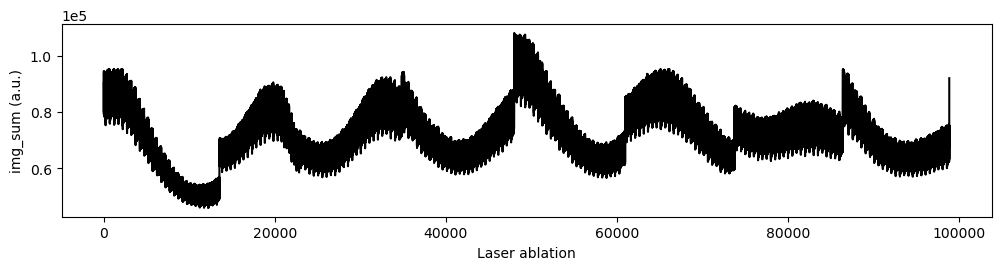

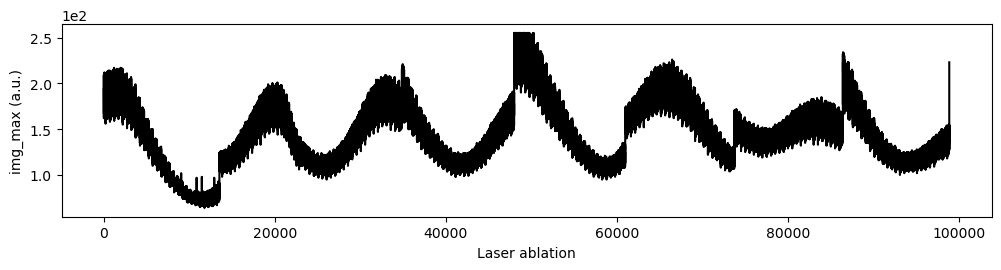

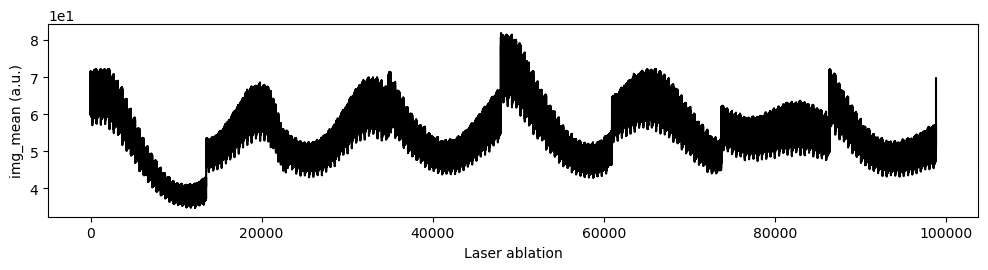

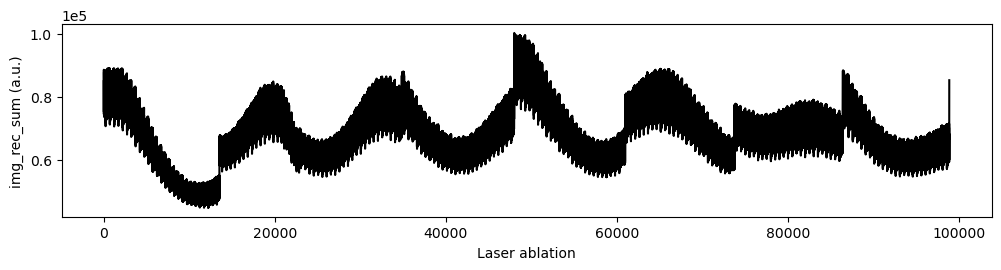

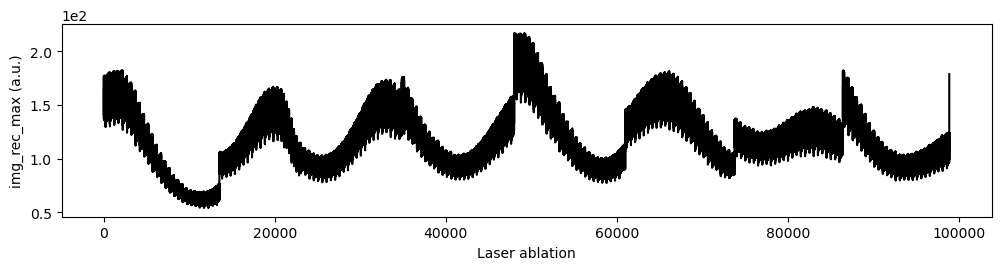

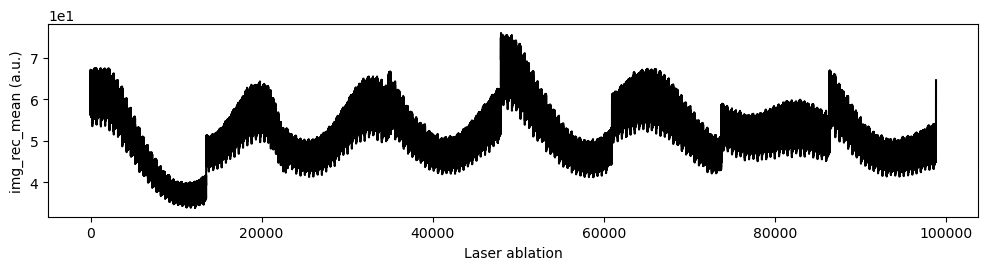

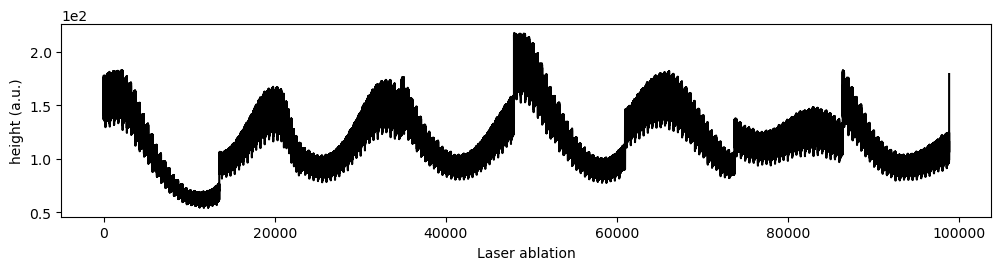

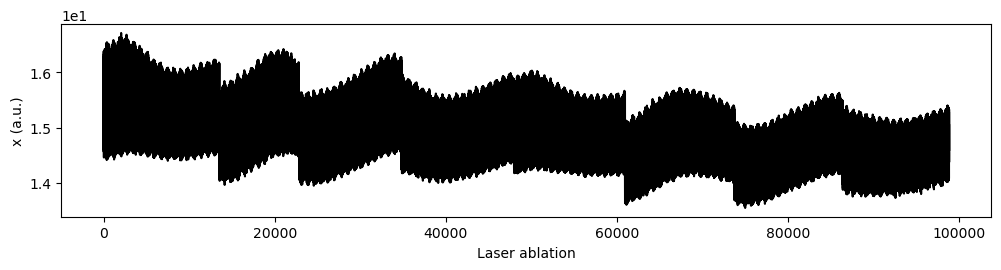

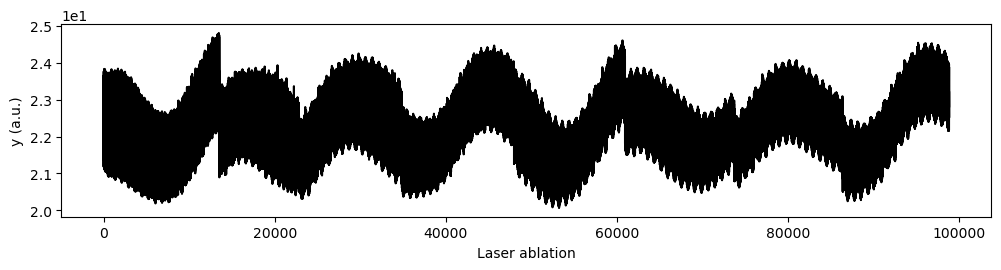

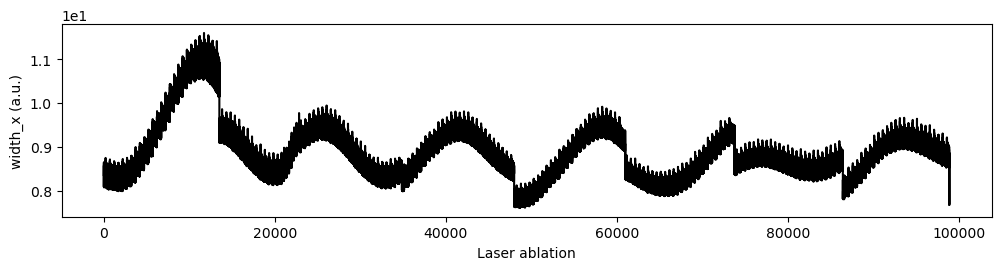

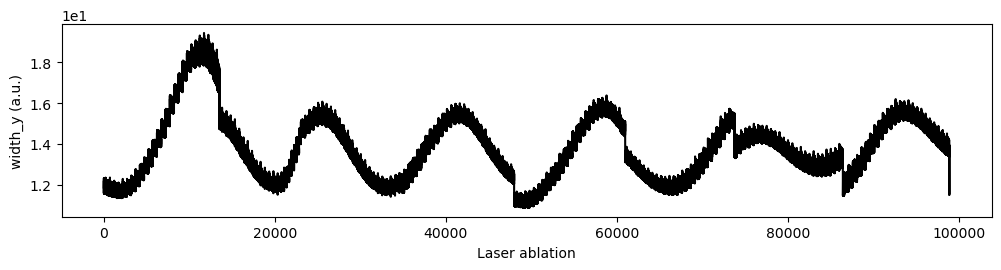

In [73]:
h5_para_file = 'C:/Users/yig319/Dropbox (LU Student)/RHEED/data/test9_gaussian_fit_parameters_all-03292023.h5'
growth_dict = {'growth_01':1, 'growth_02':1, 'growth_03':1, 'growth_04':1, 'growth_05':1, 'growth_06':1, 'growth_07':1, 'growth_08':1}

parameters_all = []
with h5py.File(h5_para_file, mode='r') as h5:
#     print(h5['growth_1.']['spot_2'].keys())
    for g in growth_dict.keys():
        parameters_all.append(np.array(h5[g]['spot_2']['parameters']))
parameters_all = np.concatenate(parameters_all)

titles = ['img_sum', 'img_max', 'img_mean', 'img_rec_sum', 'img_rec_max', 'img_rec_mean', 'height', 'x', 'y', 'width_x', 'width_y']
for i, title in enumerate(titles):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))
    plt.plot(parameters_all[:, i], color='k')
    set_labels(ax, xlabel='Laser ablation', ylabel=title+' (a.u.)')
    plt.savefig(f'../figures/s2.gaussian_parameters-TiO2_u0.16-{title}.png', bbox_inches='tight', dpi=300)
    plt.show()